In [177]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
reference_sequence = 'AA'

alphabet = ['A','B']

L = len(sequence)

In [55]:
def mutate(sequence, position=None):
    '''
        Function that creates a random mutation of a sequence
    '''
    global alphabet
    if position==None:
        position = rd.randint(0,len(sequence)-1)
    alphabet_sample = alphabet.copy()
    alphabet_sample.remove(sequence[position])
    sequence_aux = sequence[:position] + str(rd.sample(alphabet_sample,1)[0]) + sequence[position+1:]
    
    return sequence_aux
        

In [72]:
def population_to_vector(population):
    '''
        Function that given a population, returns the state vector based on the 
        index_fitness
    '''
    
    global index_fitness
    
    count = {g:0 for g in list(index_fitness.keys())}
    
    for element in population:
        count[element] +=1
    return count

In [253]:
index_fitness = {'AA':1, 'AB':0, 'BA':0, 'BB':10}

In [258]:
max_pop = 4

initial_pop = [reference_sequence for i in range(max_pop)]

n_steps = 30
L = len(reference_sequence)
mu = 0.25
populations  = {i:{} for i in range(n_steps+1)}
populations[0] = population_to_vector(initial_pop)


elements = [i for i in range(max_pop+1)]

def generate_vectors(n, L):
    if L == 0:
        return [tuple()]  # Return an empty tuple for the base case
    vectors = []
    for i in range(n+1):
        sub_vectors = generate_vectors(n, L-1)
        for sub_vector in sub_vectors:
            vectors.append((i,) + sub_vector)  # Append as tuples
    return vectors

n = max_pop  # The maximum element in the vector
vectors = generate_vectors(n, len(alphabet)**L)
states = {v:0 for v in vectors}

states_time = {i:{} for i in range(n_steps+1)}

In [259]:
for rep in range(1000):
    for step in range(1, n_steps+1): 
        aux_pop = []
        for sequence in populations[step-1].keys():
            for k in range(populations[step-1][sequence]):
                n_desc = index_fitness[sequence]
                #print(n_desc)
                for j in range(n_desc):
                    aux_seq = sequence
                    for i in range(L):
                        if rd.random()<mu:
                            aux_seq = mutate(aux_seq, position=i)
                    aux_pop.append(aux_seq)
        aux_pop = population_to_vector(aux_pop)
        for seq in aux_pop.keys():
            if aux_pop[seq] > max_pop:

                populations[step][seq] = max_pop
            else:
                populations[step][seq] = aux_pop[seq]
    vector = tuple(populations[n_steps].values())
    states[vector] +=1

In [260]:
sorted_dict = dict(sorted(states.items(), key=lambda x: x[1], reverse=True))

sorted_dict

{(0, 0, 0, 0): 524,
 (4, 4, 4, 4): 318,
 (3, 4, 4, 4): 59,
 (2, 4, 4, 4): 44,
 (1, 4, 4, 4): 22,
 (4, 4, 3, 4): 11,
 (4, 3, 4, 4): 5,
 (0, 4, 4, 4): 3,
 (3, 3, 4, 4): 3,
 (2, 3, 4, 4): 2,
 (4, 2, 4, 4): 2,
 (4, 4, 2, 4): 2,
 (1, 4, 3, 4): 1,
 (2, 1, 4, 4): 1,
 (3, 2, 4, 4): 1,
 (3, 4, 3, 4): 1,
 (4, 4, 1, 4): 1,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 0, 3): 0,
 (0, 0, 0, 4): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 1, 3): 0,
 (0, 0, 1, 4): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 0, 2, 3): 0,
 (0, 0, 2, 4): 0,
 (0, 0, 3, 0): 0,
 (0, 0, 3, 1): 0,
 (0, 0, 3, 2): 0,
 (0, 0, 3, 3): 0,
 (0, 0, 3, 4): 0,
 (0, 0, 4, 0): 0,
 (0, 0, 4, 1): 0,
 (0, 0, 4, 2): 0,
 (0, 0, 4, 3): 0,
 (0, 0, 4, 4): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 0, 3): 0,
 (0, 1, 0, 4): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 1, 3): 0,
 (0, 1, 1, 4): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 1, 2, 3): 0,
 (

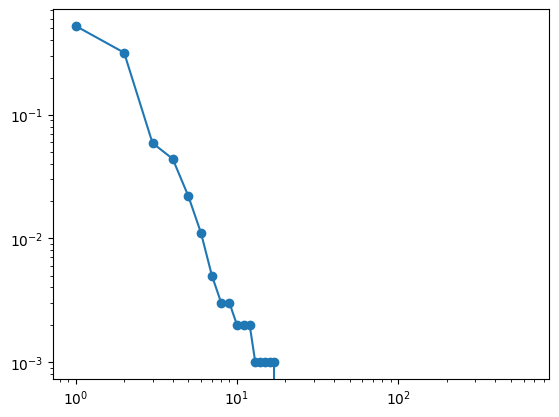

In [261]:


y = np.array(list(sorted_dict.values()))
y = y/y.sum()
x = [1+i for i in range(len(y))]

plt.plot(x,y, 'o-')
plt.yscale('log')
plt.xscale('log')

In [262]:
#Now, plot the genotype network with node size -> relative frequency, and then 